In [1]:
from flask import Flask, request, jsonify, render_template, send_file
from keras.models import load_model
from flask.json import JSONEncoder
import keras
import numpy as np
from PIL import Image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
import pandas as pd
from module import date_num
from module import instar_crawling
from module import network
from module import word_cloud
from PIL import Image
## remove cache 
from functools import wraps, update_wrapper
from datetime import datetime

# 버퍼 지우기
import sys
sys.stdout.flush()

model_best = load_model('model\\trainedmodel_91class.hdf5', compile=False)  # 로컬 폴더 맞춰서 수정하기

food_df = pd.read_csv('model\\food_list')  # 로컬 폴더 맞춰서 수정하기
food_df = food_df.drop('Unnamed: 0', axis=1)
food_df.columns = ['food']

food_name = []

# 캐시 삭제
# def nocache(view):
#   @wraps(view)
#   def no_cache(*args, **kwargs):
#     response = make_response(view(*args, **kwargs))
#     response.headers['Last-Modified'] = datetime.now()
#     response.headers['Cache-Control'] = 'no-store, no-cache, must-revalidate, post-check=0, pre-check=0, max-age=0'
#     response.headers['Pragma'] = 'no-cache'
#     response.headers['Expires'] = '-1'
#     return response      
#   return update_wrapper(no_cache, view)

app = Flask(__name__, static_url_path='/static')

@app.route('/', methods=['get','post'])  # http://127.0.0.1:5000/
def main():
    food_name.clear
    return render_template('main.html')

@app.route('/predict', methods=['post'])
def predict():
    img = Image.open(request.files['file'].stream)
    img1 = img.resize((299, 299))
    img1 = image.img_to_array(img1)
    img1 = np.expand_dims(img1, axis=0)
    img1 = preprocess_input(img1)
    img1 = img1.reshape(1, 299, 299, 3)

    pred = model_best.predict(img1)
    index = np.argmax(pred)
    pred_value = food_df['food'][index]
   
    food_name.insert(0, pred_value)

    return '{0}'.format(pred_value)

#이미지 리로딩
@app.route('/reloading')
def get_image():
    filename = 'C://projects/TAG_ME/static/uploads/food.jpg'
    return send_file(filename, mimetype='image/jpg')

@app.route('/member') 
def getMember():
    return render_template('member.html')

@app.route('/result') 
# @nocache 
def getResult():
    if food_name[0] == '피자':
#         instar_crawling.crawling(food_name[0])
        date_num.date_num_pl()
        network.network_pl() # 피자
        recom_tag = word_cloud.cloud_pl()
        
    elif food_name[0] == '햄버거':
#         instar_crawling.crawling(food_name[0])
        date_num.date_num_ham()
        network.network_ham() # 햄버거
        recom_tag = word_cloud.cloud_ham()
        
    elif food_name[0] == '만두':
#         instar_crawling.crawling(food_name[0])
        date_num.date_num_ma()
        network.network_ma() # 만두
        recom_tag = word_cloud.cloud_ma()
        
    # 찐 실시간 코드
    else: 
        instar_crawling.crawling(food_name[0])
        date_num.date_num()
        network.network() # 피자
        recom_tag = word_cloud.cloud()
        
    return render_template('result.html', recom_tag = recom_tag)

@app.route('/introduce') 
def getIntroduce():
    return render_template('introduce.html')

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [30/Sep/2021 21:38:21] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Sep/2021 21:38:26] "POST /predict HTTP/1.1" 200 -
C:\Users\user\.conda\envs\flask\lib\site-packages\pandas\core\frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


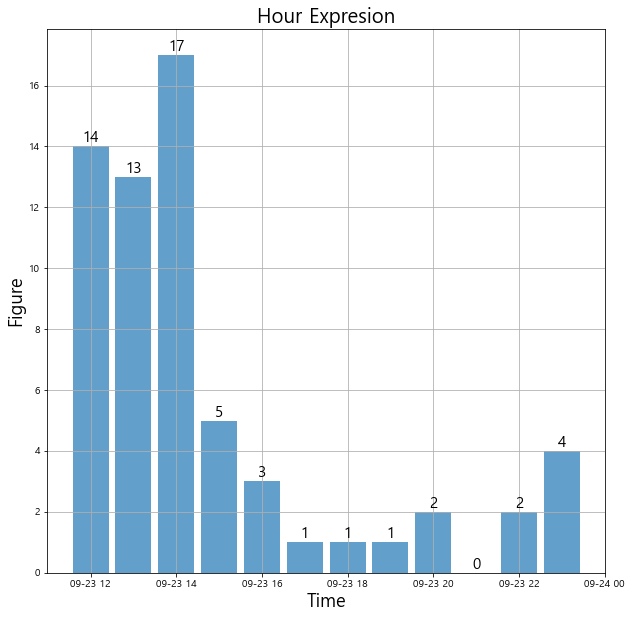

127.0.0.1 - - [30/Sep/2021 21:38:27] "GET /result HTTP/1.1" 200 -


In [ ]:
app.run(host='127.0.0.1', port=5000, debug=False)
## Jupyter Notebook에서는 debug시 에러가 뜸